In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
play_store = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')
reviews = pd.read_csv('../input/google-play-store-apps/googleplaystore_user_reviews.csv')

In [30]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Tasks

- Which app categories and genres are most popular?
- Of the top 10 most popular apps, how many are free? 
- Is there a correlation between price and popularity?

# Data Preparation

In [32]:
play_store.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [74]:
play_store_clean = play_store.copy()
play_store_clean.Installs = play_store_clean.Installs.str.replace('Free', '0')
play_store_clean.Installs = play_store_clean.Installs.str.replace('+', '')
play_store_clean.Installs = play_store_clean.Installs.str.replace(',', '')
play_store_clean.Installs = play_store_clean.Installs.astype('int32')

ValueError: invalid literal for int() with base 10: '19M'

In [38]:
play_store_clean.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int32)

In [66]:
# play_store_clean.Size = play_store_clean.Size.str.replace('Varies with device', '0')

In [72]:
play_store_clean.Size = play_store_clean.Size.str.replace(',', '')
play_store_clean.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '0', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M',
       '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M',
       '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k',
       

In [73]:
for i in play_store_clean.Size:
    if i == 'Varies with device':
        i = float(0)
    if i[-1] == 'M' or i[-1] == '+':
        i = i[:-1]
        i = float(i)
    else:
        i = i[:-1]
        i = float(i)
        i = i/1000

ValueError: could not convert string to float: 

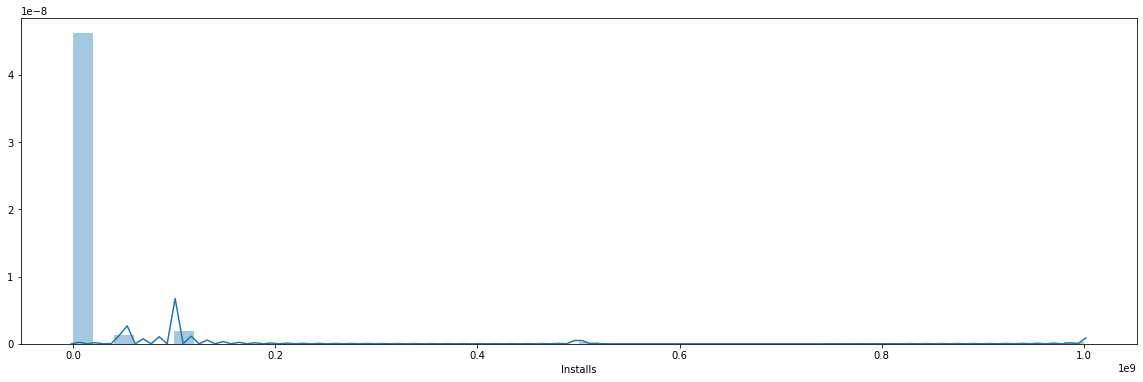

In [49]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(play_store_clean.Installs, ax = ax);

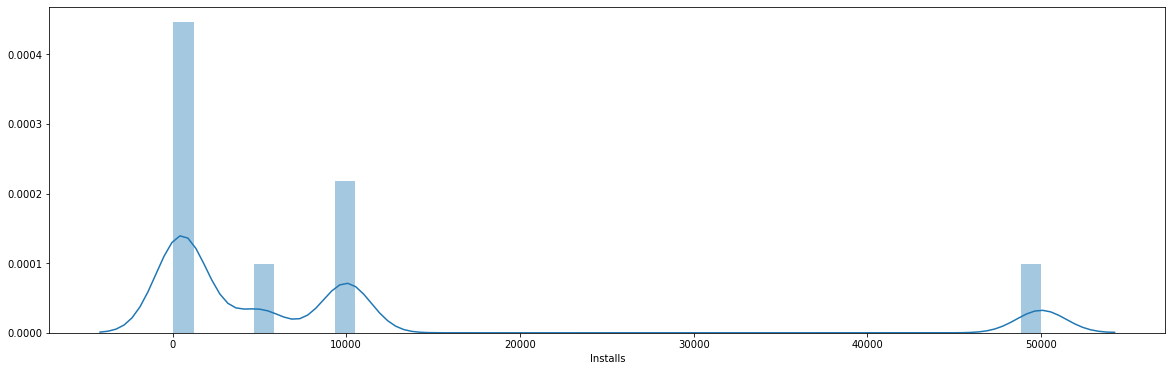

In [51]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(play_store_clean.Installs[(play_store_clean.Installs > 10) & (play_store_clean.Installs < 100_000)], ax = ax);